## Tensorflow Datasets

In [0]:
!pip install tensorflow-datasets

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D

import tensorflow_datasets as tfds

In [4]:
tfds.list_builders()

['abstract_reasoning',
 'bair_robot_pushing_small',
 'caltech101',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_corrupted',
 'cnn_dailymail',
 'coco2014',
 'colorectal_histology',
 'colorectal_histology_large',
 'cycle_gan',
 'diabetic_retinopathy_detection',
 'dsprites',
 'dtd',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'fashion_mnist',
 'flores',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'image_label_folder',
 'imagenet2012',
 'imagenet2012_corrupted',
 'imdb_reviews',
 'iris',
 'kmnist',
 'lm1b',
 'lsun',
 'mnist',
 'moving_mnist',
 'multi_nli',
 'nsynth',
 'omniglot',
 'open_images_v4',
 'oxford_flowers102',
 'oxford_iiit_pet',
 'para_crawl',
 'quickdraw_bitmap',
 'rock_paper_scissors',
 'shapes3d',
 'smallnorb',
 'squad',
 'starcraft_video',
 'sun397',
 'svhn_cropped',
 'ted_hrlr_translate',
 'ted_multi_translate',
 'tf_flowers',
 'titanic',
 'ucf101',
 'voc2007',
 'wikipedia',
 'wmt15_translate',
 'wmt1

Now that's quite a long list. Let us use ***horses_or_humans*** dataset.

In [0]:
dataset, info = tfds.load("horses_or_humans", with_info=True)

info gives us useful information regarding the datset, useful for preprocessing and building pipelines.

In [47]:
print(info)

tfds.core.DatasetInfo(
    name='horses_or_humans',
    version=1.0.0,
    description='A large set of images of horses and humans.',
    urls=['http://laurencemoroney.com/horses-or-humans-dataset'],
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2)
    },
    total_num_examples=1283,
    splits={
        'test': <tfds.core.SplitInfo num_examples=256>,
        'train': <tfds.core.SplitInfo num_examples=1027>
    },
    supervised_keys=('image', 'label'),
    citation='"""
        @ONLINE {horses_or_humans,
        author = "Laurence Moroney",
        title = "Horses or Humans Dataset",
        month = "feb",
        year = "2019",
        url = "http://laurencemoroney.com/horses-or-humans-dataset"
        }
        
    """',
    redistribution_info=,
)



In [0]:
#split the dataset
train_data = dataset['train']
test_data = dataset['test']

Label: 0


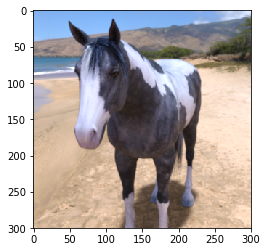

In [54]:
train_example, = train_data.take(1)
image, label = train_example['image'], train_example['label']

plt.imshow(image.numpy())
print(f'Label: {label.numpy()}', )

### Building Input Pipelines

In [0]:
#repeat the dataset to have an infinite stream of examples, 
#shuffle and create batches of 32 
train_data = train_data.repeat().shuffle(1024).batch(32)

#asynchronously fetch batches while training the model
train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)

The above will build an input pipeline which can be passed to the model.fit function. 

But in this case, notice in info that shape of image is (None, None, 3). Hence it needs some preprocessing. 
We will use ***ImageDataGenerator*** to do that in the upcoming notebooks.